<a href="https://colab.research.google.com/github/minajm/Msc_Diss_Cod/blob/main/D02124995_Mina_Jmashidian_Disseratation_Main_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Name: Mina Jamshidian 
# Student Number: D20124995

# Installing Prerequisites

In [ ]:
# !pip3 install mxnet-cu100

In [ ]:
# !pip3 install bert-embedding

In [ ]:
# !pip3 install sentence-transformers

# Improting Packages

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
from numpy import save, load
import seaborn as sns
import itertools
import random
import os
import re
import sys
from matplotlib import pyplot as plt

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries for machine learning and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Import additional libraries for statistical analysis and transformer models
from scipy.stats import shapiro
from scipy import stats 

# Import necessary libraries for bert and sbert
import mxnet as mx
from bert_embedding import BertEmbedding
from sentence_transformers import SentenceTransformer

In [ ]:
# Import Natural Language Toolkit (nltk) library and download necessary data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import nltk functions for tokenization and POS tagging
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tag import pos_tag

# Import nltk functions for text preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Importing Dataset

In [2]:
d = pd.read_csv('top4games.csv')

In [5]:
d.head(2)

,Unnamed: 0,Unnamed: 0.1,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,7287921,7287922,252490,Rust,84790990,english,7DaysToDie is waaay better.,1610807318,1610807318,False,...,True,False,False,76561198100882147,422,120,24607.0,360.0,24404.0,1.610820e+09
1,7289651,7289652,252490,Rust,84708092,english,It's just the best of them,1610684730,1610684730,True,...,True,False,False,76561198027311238,210,15,113620.0,4.0,113620.0,1.610685e+09


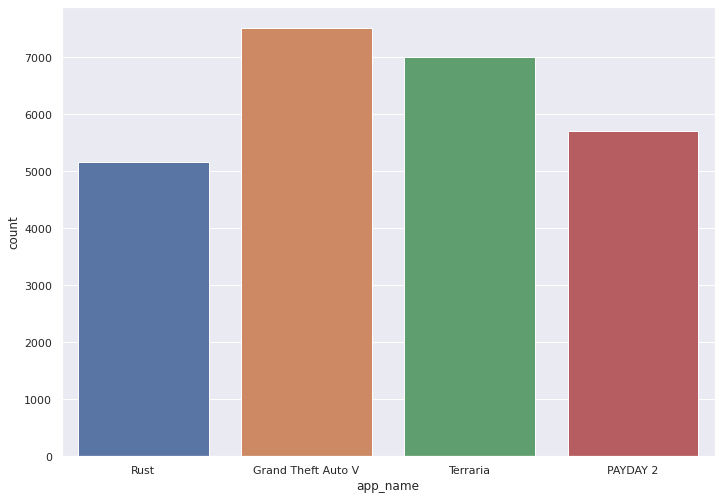

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a countplot
sns.countplot(data=d, x="app_name")

# Data Preparation

## Handling Missing Data

In [10]:
# Drop any rows with missing values
d=d.dropna()

In [11]:
d.shape

(25406, 24)

In [12]:
data = d.copy()

In [13]:
# Select the 'review' and 'recommended' columns from the data DataFrame and store them in a new DataFrame called 'df_goal'
df_goal = data[['review', 'recommended']]

##Data Type Conversion

In [ ]:
# Replace the boolean values in the 'recommended' column of the 'df_goal' DataFrame with 0 and 1
df_goal['recommended'].replace({False: 0, True: 1}, inplace=True)

In [ ]:
# Convert the 'review' column of the 'df_goal' DataFrame to a string data type
df_goal['review'] = df_goal['review'].astype('str')
df_goal.dtypes

review         object
recommended     int64
dtype: object



## Data Splitting to Train & Test

After the extraction of the target data, it would be divided by train_test_split from Sklearn:

In [ ]:
# Spliting data to train & test by train_test_split
train_data, test_data = train_test_split(df_goal, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print('Train Data Shape Befor cleaning:',train_data.shape)
print('Test Data Shape Befor cleaning:',test_data.shape)

Train Data Shape Befor cleaning: (20324, 2)
Test Data Shape Befor cleaning: (5082, 2)


## Text Preprocessing


###Lowercasing, Removing of Punctuation & Fixing structural errors


In [ ]:
def ReviewCleaning(review):
    """
    Preprocess a review to prepare it for analysis with TF-IDF, BERT, or SBERT.
    """
    # Lowercase the review
    review = review.strip().lower()
    # Expand contractions    
    review = re.sub(r"can't", "can not", review)
    review = re.sub(r"'ve", " have", review)
    review = re.sub(r"'re", " are", review)
    review = re.sub(r"n't", " not", review)
    review = re.sub(r"won't", "will not", review)
    review = re.sub(r"'ll", " will", review)
    
    # For TF-IDF , remove numbers and hyphens
    if review_transfomer is not 'BERT_WS':
        review = re.sub(r"[0-9]+", ' ', review)
        review = re.sub(r"-", ' ', review)
    
    # For BERT and SBERT, replace punctuation with spaces, 
    # For the purpose of detecting the end of a sentence, these two marks were saved ("!"", "?"")
    if review_transfomer is 'BERT_WS':
        punctuations='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        review = re.sub(r'\!+', '!', review)
        review = re.sub(r'\?+', '?', review)
    else:
        # For TF-IDF, remove punctuation
        punctuations='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    
    # Replace punctuation with spaces
    dict_trans = dict((w, " ") for w in punctuations)
    map_trans = str.maketrans(dict_trans)
    review = review.translate(map_trans)

    # For TF-IDF, Remove single-letter words
    if review_transfomer is not 'BERT_WS':
        review = ' '.join([z for z in review.split() if len(z)>1])    
   
    # For BERT & SBERT, remove parentheses
    if review_transfomer is 'BERT_WS':
        review = re.sub(r'\( *\)', ' ', review)

    # Multi-spaces that exist in review for TF-IDF, BERT & SBERT removed and replaced with a single space
    review = re.sub(' +', ' ', review)    
    review = ''.join(review)

    return review

#### Adding "clean_review" Column to Trian & Test Dataset

In [ ]:
review_transfomer = ''
# Preprocess the reviews in the training data
train_data['prep_review'] = train_data['review'].apply(ReviewCleaning)
# Preprocess the reviews in the test data
test_data['prep_review'] = test_data['review'].apply(ReviewCleaning)

### Stemming and Lemmatization
Adding 'clean_review_normalized' column to train & test dataset

In [ ]:
def POSTagNormLemStem(review):
    """
    Perform part-of-speech tagging, lemmatization, and stemming on a review.
    """
    # Tokenize the review
    wordList = word_tokenize(review)
    stemm = PorterStemmer() 
    lemm = WordNetLemmatizer()
    rvw = []

    # Perform lemmatization and stemming based on part-of-speech tagging
    for word, tag in pos_tag(wordList):
        if tag.startswith('J'):
            w = lemm.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            w = lemm.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            w = lemm.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            w = lemm.lemmatize(word, pos='r')
        else:
            w = word
        w = stemm.stem(w)
        rvw.append(w)
    
    # Join the processed words into a single string
    Norm_review = ' '.join(rvw)
    return Norm_review


#### Adding "clean_review_normalized" Column to Trian & Test Dataset for TF-IDF

In [ ]:
# Preprocess the reviews in the training data for use with TF-IDF
train_data['prep_review_tfidf'] = train_data['prep_review'].apply(POSTagNormLemStem)
# Preprocess the reviews in the test data for use with TF-IDF
test_data['prep_review_tfidf'] = test_data['prep_review'].apply(POSTagNormLemStem)

### Removing Low Frequency words
Find words that have been repeated less than 5 times in the entire dataset.

In [ ]:
# Identify low-frequency words in the training data
train_low_frq = pd.Series(' '.join(train_data['prep_review_tfidf']).split()).value_counts()
# Identify words in the training data that occur less than 5 times
train_less5_frq = train_low_frq[(train_low_frq <5)]

# Identify low-frequency words in the test data
test_low_frq = pd.Series(' '.join(test_data['prep_review_tfidf']).split()).value_counts()
# Identify words in the test data that occur less than 5 times
test_less5_frq = test_low_frq[(test_low_frq <5)]

This effectively decreases the dimensions of TF-IDF vectors.

In [ ]:
# Remove low-frequency words from the preprocessed reviews in the training data
train_data['prep_review_tfidf'] = train_data['prep_review_tfidf'].apply(
    lambda x: ' '.join(x for x in x.split() if x not in train_less5_frq))
# Remove low-frequency words from the preprocessed reviews in the test data
test_data['prep_review_tfidf'] = test_data['prep_review_tfidf'].apply(
    lambda x: ' '.join(x for x in x.split() if x not in test_less5_frq))

#### Adding "clean_review_bert" to Train and Test Dataset for BERT & SBERT

In [ ]:
# For BERT and SBERT
review_transfomer = 'BERT_WS'
train_data['prep_review_bert_sbert'] = train_data['review'].apply(ReviewCleaning)
test_data['prep_review_bert_sbert'] = test_data['review'].apply(ReviewCleaning)

### Test of Cleaning Review


In [21]:
print("\nA review example of dataset before prperation and  cleaning:", end="\n\n")
print(train_data.iloc[4]['review'], end='\n\n\n')

print("Initial review prepration for TF-IDF, BERT & SBERT (prep_review):", end="\n\n")
print(train_data.iloc[4]['prep_review'], end="\n\n\n")

print("Review prepration for TF-IDF (prep_review_tfidf):", end="\n\n")
print(train_data.iloc[4]['prep_review_tfidf'], end="\n\n\n")

print("Review prepration for BERT & SBERT (prep_review_bert_sbert):", end="\n\n")
print(train_data.iloc[4]['prep_review_bert_sbert'], end="\n\n\n")


A review example of dataset before prperation and  cleaning:

This game is super toxic and it takes a lot of time to find a group who isnt toxic. unless youre playing on a pve server or with a group, dont.


Initial review prepration for TF-IDF, BERT & SBERT (prep_review):

this game is super toxic and it takes lot of time to find group who isnt toxic unless youre playing on pve server or with group dont


Review prepration for TF-IDF (prep_review_tfidf):

thi game be super toxic and it take lot of time to find group who isnt toxic unless your play on pve server or with group dont


Review prepration for BERT & SBERT (prep_review_bert_sbert):

this game is super toxic and it takes a lot of time to find a group who isnt toxic. unless youre playing on a pve server or with a group, dont.




### Final Cleaning

In [ ]:
# Replace empty strings with NaN values in the training data
nan_value = float("NaN")
train_data.replace("", nan_value, inplace=True)
# Drop rows with NaN values in the training data
train_data = train_data.dropna()

In [ ]:
# Replace empty strings with NaN values in the test data
nan_value = float("NaN")
test_data.replace("", nan_value, inplace=True)
# Drop rows with NaN values in the test data
test_data = test_data.dropna()

In [ ]:
print('Train Data Shape:',train_data.shape)
print('Test Data Shape:',test_data.shape)

Train Data Shape: (19841, 5)
Test Data Shape: (4929, 5)


In [ ]:
# Create a new column in the training data that counts the number of unique words in each review
train_data['len'] = train_data['prep_review_tfidf'].map(lambda x: len(set(x)))

In [ ]:
# Drop rows from the training data that have less than 3 unique words
train_data = train_data.drop(train_data[train_data['len'] < 3].index)

In [ ]:
# Create a new column in the test data that counts the number of unique words in each review
test_data['len'] = test_data['prep_review_tfidf'].map(lambda x: len(set(x)))

In [ ]:
# Drop rows from the test data that have less than 3 unique words
test_data = test_data.drop(test_data[test_data['len'] < 3].index)

In [ ]:
print('Final Train Data Shape:',train_data.shape)
print('Final Test Data Shape:',test_data.shape)

Final Train Data Shape: (19517, 6)
Final Test Data Shape: (4849, 6) 4849


## Save Final Train & Test Data For Modeling Part

In [14]:
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

# Improting Train & Test Data

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [1]:
# train_data.head(2)

In [2]:
# test_data.head(2)

# TFIDF, BERT & SBERT Text Transformer + SVM Classifier

## Text Transformer

### TFIDF

In [7]:
# Set the review transformer to use Tf-Idf vectorization
review_transfomer = 'TFIDF'

# Initialize a Tf-Idf vectorizer with n-grams ranging from 1 to 2 and a maximum of 16000 features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=16000)

# Use the vectorizer to transform the training and test data
tfidf_features_train = vectorizer.fit_transform(train_data["prep_review_tfidf"])    
tfidf_features_test = vectorizer.transform(test_data["prep_review_tfidf"])

In [8]:
print("tfidf_features_train",tfidf_features_train.shape)
print("tfidf_features_train",tfidf_features_test.shape)

tfidf_features_train (19517, 16000)
tfidf_features_train (4849, 16000)


### BERT & SBERT

In [ ]:
# Set the context to the first CPU
ctx = mx.cpu(0)
# Create a BertEmbedding object with the specified context
bert = BertEmbedding(ctx=ctx)

Vocab file is not found. Downloading.


In [ ]:
review_transfomer = 'BERT'

In [ ]:
# for using BERT & SBERT : Define a function that returns the mean of a list of numbers

def MeanBertSBERT(i): 
    return sum(itertools.chain(i))/len(i)

In [ ]:
# Create a SentenceTransformer object using the 'bert-base-nli-mean-tokens' model
bert_transformers = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
def bert_sbert_embbed(text):
    # Split the text into sentences    
    sentences = re.split('!|\?|\.',text)
    # Remove empty strings from the list of sentences    
    sentences = list(filter(None, sentences)) 

    # Check if using word-level or sentence-level BERT embeddings
    if bert_version == 'WORD':
        # Get BERT embeddings for each word in each sentence
        result = bert(sentences, 'avg')
        # Extract the BERT vocabularies for each word in each sentence
        bert_vocabs_of_sentence = []
        for sentence in range(len(result)):
            for word in range(len(result[sentence][1])):
                bert_vocabs_of_sentence.append(result[sentence][1][word])
        # Calculate the mean BERT vocabulary for each sentence
        feature = [MeanBertSBERT(x) for x in zip(*bert_vocabs_of_sentence)]

    elif bert_version == 'SENTENCE':
        # Get BERT embeddings for each sentence
        result = bert_transformers.encode(sentences)
        # Calculate the mean BERT vocabulary for each sentence
        feature = [MeanBertSBERT(x) for x in zip(*result)]

    # Return the mean BERT vocabulary for each sentence as an array
    return np.asarray(feature).reshape((768,1))

#### BERT (Word Transformer)

In [ ]:
# Set the type of BERT embeddings to use
bert_version = 'WORD'

# Create an empty list to store the BERT embeddings for the training data
bert_features_train=[]
# Iterate through the preprocessed reviews in the training data
for i in train_data['prep_review_bert_sbert']:
    # Calculate the BERT embeddings for each review
    bert_features_train.append(bert_sbert_embbed(i))

In [ ]:
bert_features_train1 = bert_features_train

In [ ]:
# Extract the BERT embeddings from the list of BERT embeddings
feature = [x for x in bert_features_train1]
# Convert the list of BERT embeddings to a numpy array and reshape it to have one row per review
bert_features_train1 = np.asarray(feature).reshape(len(train_data),768)

In [ ]:
# save to npy file
save('bert_features_train1.npy', bert_features_train1)

In [ ]:
# Set the type of BERT embeddings to use
bert_version = 'WORD'

# Create an empty list to store the BERT embeddings for the test data
bert_features_test=[]
# Iterate through the preprocessed reviews in the test data
for i in test_data['prep_review_bert_sbert']:
    # Calculate the BERT embeddings for each review
    bert_features_test.append(bert_sbert_embbed(i))

In [ ]:
bert_features_test1= bert_features_test

In [ ]:
# Extract the BERT embeddings from the list of BERT embeddings
feature = [x for x in bert_features_test1]
# Convert the list of BERT embeddings to a numpy array and reshape it to have one row per review
bert_features_test1 = np.asarray(feature).reshape(len(test_data),768)

In [ ]:
# save to npy file
save('bert_features_test1.npy', bert_features_test1)

In [9]:
# load array
bert_features_train_new = load('bert_features_train1.npy')
bert_features_test_new = load('bert_features_test1.npy')

# print the array
print(bert_features_train_new.shape)
print(bert_features_test_new.shape)

(19517, 768)
(4849, 768)


####  SBERT (Sentence Transformer)

In [48]:
# Set the type of BERT embeddings to use
bert_version = 'SENTENCE'

# Create an empty list to store the SBERT embeddings for the training data
sbert_features_train=[]
# Iterate through the preprocessed reviews in the training data
for i in train_data['prep_review_bert_sbert']:
    # Calculate the SBERT embeddings for each review
    sbert_features_train.append(bert_sbert_embbed(i))

In [ ]:
sbert_features_train1 = sbert_features_train

In [ ]:
# Extract the SBERT embeddings from the list of SBERT embeddings
feature = [x for x in sbert_features_train1]
# Convert the list of SBERT embeddings to a numpy array and reshape it to have one row per review
sbert_features_train1 = np.asarray(feature).reshape(len(train_data),768)

In [ ]:
# save to npy file
save('sbert_features_train1.npy', sbert_features_train1)

In [49]:
# Set the type of BERT embeddings to use
bert_version = 'SENTENCE'

# Create an empty list to store the SBERT embeddings for the test data
sbert_features_test=[]
# Iterate through the preprocessed reviews in the test data
for i in test_data['prep_review_bert_sbert']:
    # Calculate the SBERT embeddings for each review
    sbert_features_test.append(bert_sbert_embbed(i))


In [ ]:
sbert_features_test1= sbert_features_test

In [ ]:
# Extract the SBERT embeddings from the list of SBERT embeddings
feature = [x for x in sbert_features_test1]
# Convert the list of SBERT embeddings to a numpy array and reshape it to have one row per review
sbert_features_test1 = np.asarray(feature).reshape(len(test_data),768)

In [ ]:
# save to npy file
save('sbert_features_test1.npy', sbert_features_test1)

In [10]:
# load array
sbert_features_train_new = load('sbert_features_train1.npy')
sbert_features_test_new = load('sbert_features_test1.npy')

# print the array
print(sbert_features_train_new.shape)
print(sbert_features_test_new.shape)

(19517, 768)
(4849, 768)


## SVM Modeling 

In [112]:
# A function to plot and print result
def modelEval(y_pred, y_prob):
# Evaluate the performance of a binary classification model

    # Compute evaluation metrics
    acc = accuracy_score(test_data["recommended"], y_pred)
    fi = f1_score(test_data["recommended"], y_pred)
    percision = precision_score(test_data["recommended"], y_pred)
    recall = recall_score(test_data["recommended"], y_pred)
    
    # Print evaluation metrics
    print ('',end='\n\n')
    print("Accuracy Percent: {:.2f} %".format(acc *100),end='\n')
    print("Accuracy: {:.4f}".format(acc *100),end='\n')
    print("f1 score: {:.4f}".format(fi),end='\n')
    print("precision score: {:.4f}".format(percision),end='\n')
    print("recall score: {:.4f}".format(recall),end='\n\n\n')
    
    # Print classification report
    print ('Classification Report:',end='\n\n')
    print(classification_report(test_data["recommended"],y_pred),end='\n\n')

    # Plot and print confusion matrix
    print ('Confusion Matrix',end='\n\n')
    cmatrix = confusion_matrix(test_data["recommended"],y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                cmatrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cmatrix.flatten()/np.sum(cmatrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()   


### TFIDF + SVM

In [16]:
# Initialize an SVM model with a linear kernel and C=1 for TF-IDF
model_svm_tfidf = SVC(kernel ='linear', C = 1)

In [17]:
# Train the SVM model using TF-IDF features
model_svm_tfidf.fit(tfidf_features_train, train_data["recommended"])

In [ ]:
# Make predictions on the test data using the trained SVM model
y_pred_tfidf_stop_svm = model_svm_tfidf.predict(tfidf_features_test)
# Compute the decision function for the predictions
y_prob_tfidf_stop_svm = model_svm_tfidf.decision_function(tfidf_features_test)



Accuracy Percent: 87.50 %
Accuracy: 87.5026
f1 score: 0.9216
precision score: 0.8986
recall score: 0.9459


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1081
           1       0.90      0.95      0.92      3768

    accuracy                           0.88      4849
   macro avg       0.83      0.79      0.81      4849
weighted avg       0.87      0.88      0.87      4849


Confusion Matrix



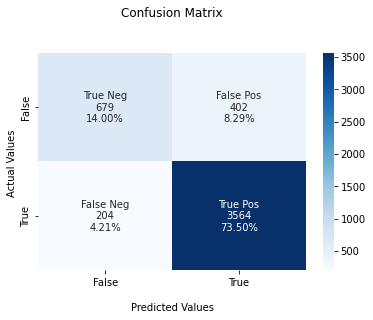

In [113]:
# Result
modelEval(y_pred_tfidf_stop_svm, y_prob_tfidf_stop_svm)

In [ ]:
# Initialize a list to store the cross-validation results for the SVM model based on TF-IDF
results_svm_tfidf = []

# Create a repeated stratified K-fold cross-validator
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)

# Evaluate the SVM model using cross-validation, with accuracy as the evaluation metric
results_svm_tfidf = cross_val_score(model_svm_tfidf, tfidf_features_train, train_data["recommended"], 
                                    cv=kfold, scoring='accuracy') 

In [ ]:
# Saving Result
np.save('results_svm_tfidf.npy', results_svm_tfidf)

In [41]:
# Loading Result
results_svm_tfidf1 = np.load('results_svm_tfidf.npy')

In [87]:
# Computing the mean and standard deviation of the scores
mean1 = results_svm_tfidf1.mean()
std1 =  results_svm_tfidf1.std()
p_mean1 = print("Mean Acurracy: {:.2f} %".format(mean1 *100),end='\n')
p_std1 = print("STD Acurracy: {:.4f}".format(std1 ),end='\n')

Mean Acurracy: 88.21 %
STD Acurracy: 0.0060


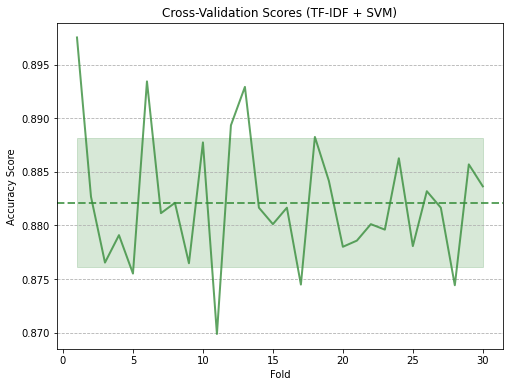

In [40]:
# create a figure
fig1, ax1 = plt.subplots(figsize=(8, 6))

# compute the mean and standard deviation of the scores
mean_scores_tfidf = np.mean(results_svm_tfidf1)
std_scores_tfidf = np.std(results_svm_tfidf1)

# create a line plot of the scores
ax1.plot(range(1, len(results_svm_tfidf1)+1), results_svm_tfidf1, color='#378D3B', linewidth=2, alpha=0.8)

# add the mean as a horizontal line
ax1.axhline(mean_scores_tfidf, color='#378D3B', linestyle='--', linewidth=2, alpha=0.8)

# add the standard deviation as a transparent band around the mean line
ax1.fill_between(range(1, len(results_svm_tfidf1)+1), mean_scores_tfidf - std_scores_tfidf, mean_scores_tfidf + std_scores_tfidf, color='#378D3B', alpha=0.2)

# add grid lines
ax1.grid(axis='y', linestyle='--')

# add plot title and axis labels
ax1.set_title("Cross-Validation Scores (TF-IDF + SVM)")
ax1.set_xlabel("Fold")
ax1.set_ylabel("Accuracy Score")

# show the plot
plt.show()

### BERT + SVM

In [24]:
# Create an SVM model with a linear kernel and C = 1
model_svm_bert = SVC(kernel ='linear', C = 1)

In [25]:
# Train the SVM model using BERT features
model_svm_bert.fit(bert_features_train_new, train_data["recommended"])

# Evaluation
# Make predictions on the test data
y_pred_bert_svm = model_svm_bert.predict(bert_features_test_new)
# Compute the decision function for the predictions
y_prob_bert_svm = model_svm_bert.decision_function(bert_features_test_new)



Accuracy Percent: 84.06 %
Accuracy: 84.0586
f1 score: 0.8998
precision score: 0.8794
recall score: 0.9212


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1081
           1       0.88      0.92      0.90      3768

    accuracy                           0.84      4849
   macro avg       0.78      0.74      0.75      4849
weighted avg       0.83      0.84      0.84      4849


Confusion Matrix



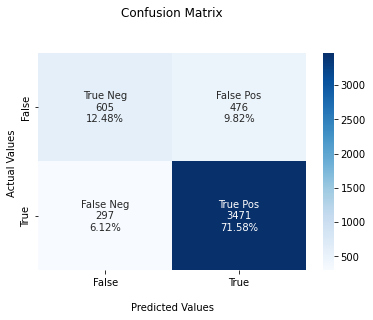

In [114]:
modelEval(y_pred_bert_svm, y_prob_bert_svm)

In [ ]:
# Initialize an empty list to store the cross-validation scores
results_svm_bert = []

# Set up the repeated stratified k-fold cross-validator
kfold_bert = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)

# Perform cross-validation on the model using the bert_features_train_new and train_data["recommended"] data
# and store the results in the results_svm_bert list
# Use the repeated stratified k-fold cross-validator and the 'accuracy' scoring metric
results_svm_bert = cross_val_score(model_svm_bert, bert_features_train_new, train_data["recommended"], 
                                   cv=kfold_bert, scoring='accuracy') 

In [ ]:
np.save('results_svm_bert.npy', results_svm_bert)

In [40]:
results_svm_bert1 = np.load('results_svm_bert.npy')

In [88]:
# Calculate the mean and standard deviation of the results_svm_bert1 list
mean2 = results_svm_bert1.mean()
std2 =  results_svm_bert1.std()

# Print the mean and standard deviation values
p_mean2 = print("Mean Acurracy: {:.2f} %".format(mean2 *100),end='\n')
p_std2 = print("STD Acurracy: {:.4f}".format(std2 ),end='\n')

Mean Acurracy: 85.71 %
STD Acurracy: 0.0064


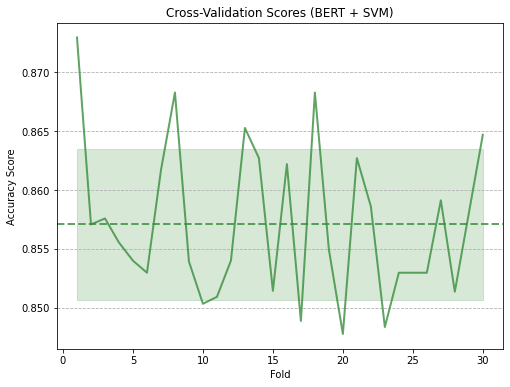

In [37]:
# create a figure
fig2, ax2 = plt.subplots(figsize=(8, 6))

# compute the mean and standard deviation of the scores
mean_scores_bert = np.mean(results_svm_bert1)
std_scores_bert = np.std(results_svm_bert1)

# create a line plot of the scores
ax2.plot(range(1, len(results_svm_bert1)+1), results_svm_bert1, color='#378D3B', linewidth=2, alpha=0.8)

# add the mean as a horizontal line
ax2.axhline(mean_scores_bert, color='#378D3B', linestyle='--', linewidth=2, alpha=0.8)

# add the standard deviation as a transparent band around the mean line
ax2.fill_between(range(1, len(results_svm_bert1)+1), mean_scores_bert - std_scores_bert, mean_scores_bert + std_scores_bert, color='#378D3B', alpha=0.2)

# add grid lines
ax2.grid(axis='y', linestyle='--')

# add plot title and axis labels
ax2.set_title("Cross-Validation Scores (BERT + SVM)")
ax2.set_xlabel("Fold")
ax2.set_ylabel("Accuracy Score")

# show the plot
plt.show()

### SBERT + TFIDF

In [54]:
# Training 
model_svm_sbert = SVC(kernel ='linear', C = 1)

In [55]:
# Train the model using the sbert_features_train_new and train_data["recommended"] data 
model_svm_sbert.fit(sbert_features_train_new, train_data["recommended"])

# Use the trained model to make predictions on the sbert_features_test_new data
y_pred_sbert_svm = model_svm_sbert.predict(sbert_features_test_new)

# Use the trained model to predict the decision function for the sbert_features_test_new data
y_prob_sbert_svm = model_svm_sbert.decision_function(sbert_features_test_new)



Accuracy Percent: 86.18 %
Accuracy: 86.1827
f1 score: 0.9123
precision score: 0.8998
recall score: 0.9252


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1081
           1       0.90      0.93      0.91      3768

    accuracy                           0.86      4849
   macro avg       0.81      0.78      0.79      4849
weighted avg       0.86      0.86      0.86      4849


Confusion Matrix



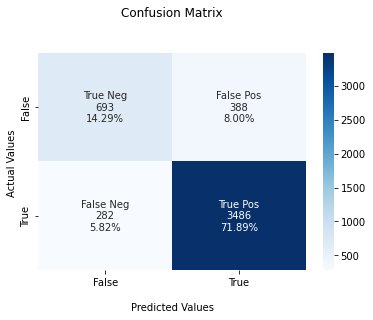

In [115]:
modelEval(y_pred_sbert_svm, y_prob_sbert_svm)

In [ ]:
# Initialize an empty list to store the cross-validation scores
results_svm_sbert = []

# Set up the repeated stratified k-fold cross-validator
kfold_sbert = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)

# Perform cross-validation on the model using the sbert_features_train_new and train_data["recommended"] data
# and store the results in the results_svm_sbert list
# Use the repeated stratified k-fold cross-validator and the 'accuracy' scoring metric
results_svm_sbert = cross_val_score(model_svm_sbert, sbert_features_train_new, train_data["recommended"], 
                                    cv=kfold_sbert, scoring='accuracy') 

In [ ]:
np.save('results_svm_sbert.npy', results_svm_sbert)

In [39]:
results_svm_sbert1 = np.load('results_svm_sbert.npy')

In [86]:
# Calculate the mean and standard deviation of the results_svm_sbert1 list
mean3 = results_svm_sbert1.mean()
std3 =  results_svm_sbert1.std()

# Print the mean and standard deviation values
p_mean3 = print("Mean Acurracy: {:.2f} %".format(mean3 *100),end='\n')
p_std3= print("STD Acurracy: {:.4f}".format(std3 ),end='\n')

Mean Acurracy: 86.93 %
STD Acurracy: 0.0060


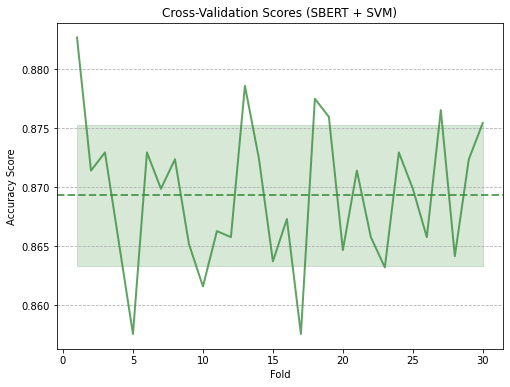

In [36]:
# create a figure
fig3, ax3 = plt.subplots(figsize=(8, 6))

# compute the mean and standard deviation of the scores
mean_scores_sbert = np.mean(results_svm_sbert1)
std_scores_sbert = np.std(results_svm_sbert1)

# create a line plot of the scores
ax3.plot(range(1, len(results_svm_sbert1)+1), results_svm_sbert1, color='#378D3B', linewidth=2, alpha=0.8)

# add the mean as a horizontal line
ax3.axhline(mean_scores_sbert, color='#378D3B', linestyle='--', linewidth=2, alpha=0.8)

# add the standard deviation as a transparent band around the mean line
ax3.fill_between(range(1, len(results_svm_sbert1)+1), mean_scores_sbert - std_scores_sbert, mean_scores_sbert + std_scores_sbert, color='#378D3B', alpha=0.2)

# add grid lines
ax3.grid(axis='y', linestyle='--')

# add plot title and axis labels
ax3.set_title("Cross-Validation Scores (SBERT + SVM)")
ax3.set_xlabel("Fold")
ax3.set_ylabel("Accuracy Score")

# show the plot
plt.show()


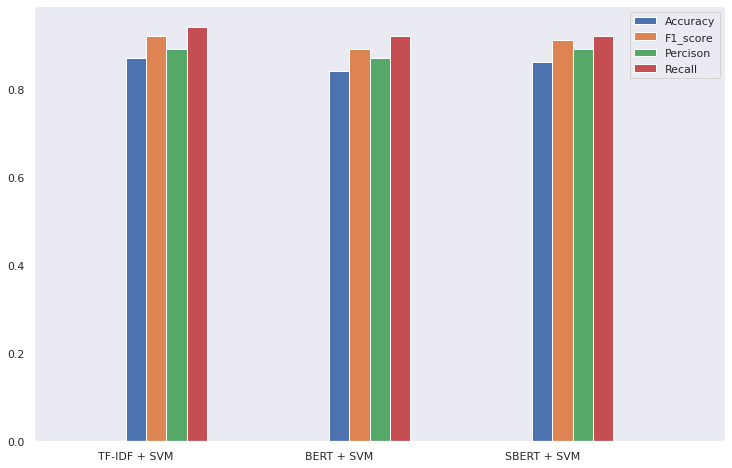

In [47]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Turn off the grid lines
plt.grid(False)

# Set the categories or settings to be plotted on the x-axis
categories = ['TF-IDF + SVM', 'BERT + SVM', 'SBERT + SVM']

# Set the values for each metric to be plotted on the y-axis
accuracy = [0.87, 0.84, 0.86]
f1_score = [0.92, 0.89, 0.91]
percison = [0.89, 0.87, 0.89]
recall = [0.94, 0.92 , 0.92]

# Set the width of each bar
bar_width = 0.1

# Set the position of the x-ticks
x_pos = [i for i in range(len(categories))]

# Plot the first metric as a bar plot
plt.bar(x_pos, accuracy, width=bar_width, label='Accuracy')

# Add the second metric as an additional bar plot, offset by the bar width
plt.bar([x + bar_width for x in x_pos], f1_score, width=bar_width, label='F1_score')

# Add the second metric as an additional bar plot, offset by the bar width
plt.bar([x + 2*bar_width for x in x_pos], percison, width=bar_width, label='Percison')

# Add the second metric as an additional bar plot, offset by the bar width
plt.bar([x + 3*bar_width for x in x_pos], recall, width=bar_width, label='Recall')

# Add the x-tick labels and set the x-axis limits
plt.xticks(x_pos, categories)
plt.xlim(-0.5, len(categories)-0.1)

# Set the margins on the left and right sides of the plot
plt.subplots_adjust(left=0.1, right=0.9)

# Add a legend and display the plot
plt.legend()
plt.show()


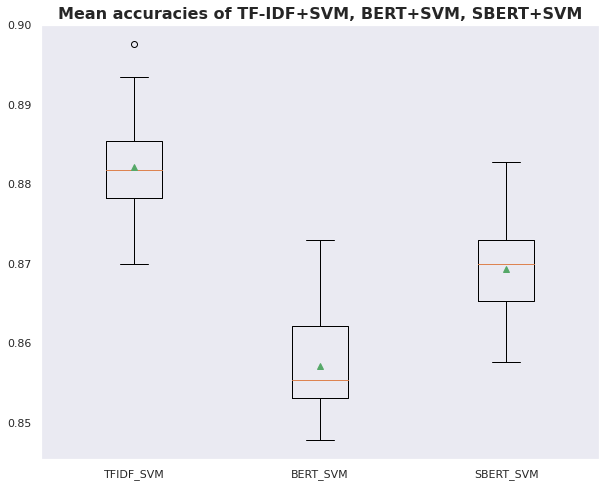

In [46]:
# Set the size of the plot figure
plt.figure(figsize = (10, 8))

# Turn off the grid lines
plt.grid(False)

# Set the title of the plot
plt.title("Mean accuracies of TF-IDF+SVM, BERT+SVM, SBERT+SVM", fontsize = 16, fontweight = 'bold')

# Create the box plot using the results_svm_tfidf1, results_svm_bert1, and results_svm_sbert1 lists as the data
# and the labels 'TFIDF_SVM', 'BERT_SVM', and 'SBERT_SVM' as the labels for each box
# Also show the mean values with markers
plt.boxplot([results_svm_tfidf1,results_svm_bert1, results_svm_sbert1], labels=['TFIDF_SVM', 'BERT_SVM', 'SBERT_SVM'], showmeans=True)

# Display the plot
plt.show()

### Normality Test 


**Shapiro-Wilk test on the normally distributed of 10 fold Cross validation of each model scores**

* H0: Sample is from the normal distributions.(Po>0.05)
* H1: Sample is not from the normal distributions.



In [ ]:
# Shapiro-Wilk test for TF-IDF + SVM
shapiro(results_svm_tfidf1)

ShapiroResult(statistic=0.9711730480194092, pvalue=0.5717493295669556)

H0 is accepted as Pvalue is bigger than of 0.05. the scores are normal 

In [ ]:
# Shapiro-Wilk test for BERT + SVM
shapiro(results_svm_bert1)

ShapiroResult(statistic=0.9446528553962708, pvalue=0.12140970677137375)

H0 is accepted as Pvalue is bigger than of 0.05. the scores are normal 

In [ ]:
# Shapiro-Wilk test for SBERT +SVM
shapiro(results_svm_sbert1)

ShapiroResult(statistic=0.9749371409416199, pvalue=0.680877149105072)

H0 is accepted as Pvalue is bigger than of 0.05. the scores are normal 

### Student t-test for Hypothesis Acceptance and Rejection

TFIDF, BERT

In [ ]:
# Calculate the mean values of the results_svm_tfidf1 and results_svm_bert1 lists
tfidf_svm_acc_scor_bar, bert_svm_acc_scor_bar = np.mean(results_svm_tfidf1), np.mean(results_svm_bert1)

# Print the mean values
print("TFIDF_SVM acuracy scores mean:",np.round(tfidf_svm_acc_scor_bar,4))
print("BERT_SVM acuracy scores mean:",np.round(bert_svm_acc_scor_bar,4))

# Calculate the number of values in the results_svm_tfidf1 and results_svm_bert1 lists
n1, n2 = len(results_svm_tfidf1), len(results_svm_bert1)

# Calculate the variance of the results_svm_tfidf1 and results_svm_bert1 lists
var_tfidf_svm_acc_scor_bar, var_bert_svm_acc_scor_bar= np.var(results_svm_tfidf1, ddof=1), np.var(results_svm_bert1, ddof=1)

# Print the variance values
print("variance of TFIDF_SVM acuracy scores:",np.round(var_tfidf_svm_acc_scor_bar,4))
print("variance of BERT_SVM acuracy scores:",np.round(var_bert_svm_acc_scor_bar,4))

# Calculate the pooled sample variance and standard error
var_tfidf_bert = ( ((n1-1)*var_tfidf_svm_acc_scor_bar) + ((n2-1)*var_bert_svm_acc_scor_bar) ) / (n1+n2-2)
std_error_tfidf_bert = np.sqrt(var_tfidf_bert * (1.0 / n1 + 1.0 / n2))

# Print the pooled sample variance and standard error
print("pooled sample variance:",var_tfidf_bert)
print("standard error:",std_error_tfidf_bert)

TFIDF_SVM acuracy scores mean: 0.8821
BERT_SVM acuracy scores mean: 0.8571
variance of TFIDF_SVM acuracy scores: 0.0
variance of BERT_SVM acuracy scores: 0.0
pooled sample variance: 3.990334972277346e-05
standard error: 0.0016310191031534743


In [ ]:
# Calculating of t-static
t = abs(tfidf_svm_acc_scor_bar - bert_svm_acc_scor_bar) / std_error_tfidf_bert
print('t static:',t)

# Calculating two-tailed & one-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.975, df=12)
t_c = stats.t.ppf(q=0.95, df=12)
print("Critical value for t two tailed:",t_c)
print("Critical value for t one tailed:",t_c)

# Calculating two-tailed & one-tailed p-value
p_two = 2*(1-stats.t.cdf(x=t, df=12))
 
# Calculating two-tailed & one-tailed p-value
p_one = 1-stats.t.cdf(x=t, df=12)
print("p-value for two tailed:",p_two)
print("p-value for one tailed:",p_one)

t static: 15.361583982012796
Critical value for t two tailed: 2.1788128296634177
Critical value for t one tailed: 1.782287555649159
p-value for two tailed: 2.958851386125616e-09
p-value for one tailed: 1.479425693062808e-09


In [3]:
pval_tfidf_bert = 2.958851386125616e-09
stat_tfidf_bert = 15.361583982012796

print("p-value for two tailed TF_IDF and BERT: {:.4f}".format(pval_tfidf_bert),end='\n')
print("T Static for two tailed TF_IDF and BERT: {:.4f}".format(stat_tfidf_bert),end='\n')

p-value for two tailed TF_IDF and BERT: 0.0000
T Static for two tailed TF_IDF and BERT: 15.3616


In [7]:
# Compare the p-value to the significance level (0.05)
if pval_tfidf_bert < 0.05:
  # If the p-value is less than the significance level, reject the null hypothesis
  print('H0 is rejected')
else:
  # If the p-value is greater than or equal to the significance level, accept the null hypothesis
  print('H0 is accepted')

H0 is accepted 


TFIDF , SBERT

In [ ]:
# Calculate the mean values of the results_svm_tfidf1 and results_svm_sbert1 lists
tfidf_svm_acc_scor_bar, sbert_svm_acc_scor_bar = np.mean(results_svm_tfidf1), np.mean(results_svm_sbert1)

# Print the mean values
print("TFIDF_SVM acuracy scores mean:",np.round(tfidf_svm_acc_scor_bar,4))
print("SBERT_SVM acuracy scores mean:",np.round(sbert_svm_acc_scor_bar,4))

# Calculate the number of values in the results_svm_tfidf1 and results_svm_sbert1 lists
n1, n2 = len(results_svm_tfidf1), len(results_svm_sbert1)

# Calculate the variance of the results_svm_tfidf1 and results_svm_sbert1 lists
var_tfidf_svm_acc_scor_bar, var_sbert_svm_acc_scor_bar= np.var(results_svm_tfidf1, ddof=1), np.var(results_svm_sbert1, ddof=1)
print("variance of TFIDF_SVM acuracy scores:",np.round(var_tfidf_svm_acc_scor_bar,4))
print("variance of SBERT_SVM acuracy scores:",np.round(var_sbert_svm_acc_scor_bar,4))

# Calculating pooled sample variance & standard error
var_tfidf_sbert = ( ((n1-1)*var_tfidf_svm_acc_scor_bar) + ((n2-1)*var_sbert_svm_acc_scor_bar) ) / (n1+n2-2)
std_error_tfidf_sbert = np.sqrt(var_tfidf_sbert * (1.0 / n1 + 1.0 / n2))
print("pooled sample variance:",var_tfidf_sbert)
print("standard error:",std_error_tfidf_sbert)

TFIDF_SVM acuracy scores mean: 0.8821
SBERT_SVM acuracy scores mean: 0.8693
variance of TFIDF_SVM acuracy scores: 0.0
variance of SBERT_SVM acuracy scores: 0.0
pooled sample variance: 3.733580696894729e-05
standard error: 0.0015776735397191079


In [ ]:
# Calculating of t-static
t = abs(tfidf_svm_acc_scor_bar - sbert_svm_acc_scor_bar) / std_error_tfidf_sbert
print('t static:',t)

# Calculating two-tailed & one-tailed critical value at alpha = 0.05
t_c = stats.t.ppf(q=0.975, df=12)
t_c = stats.t.ppf(q=0.95, df=12)
print("Critical value for t two tailed:",t_c)
print("Critical value for t one tailed:",t_c)
 
# Calculating two-tailed & one-tailed p-value
p_two = 2*(1-stats.t.cdf(x=t, df=12)) 
p_one = 1-stats.t.cdf(x=t, df=12)
print("p-value for two tailed:",p_two)
print("p-value for one tailed:",p_one)

t static: 8.12991570387337
Critical value for t two tailed: 2.1788128296634177
Critical value for t one tailed: 1.782287555649159
p-value for two tailed: 3.1870260888133828e-06
p-value for one tailed: 1.5935130444066914e-06


In [1]:
pval_tfidf_sbert = 3.1870260888133828e-06
stat_tfidf_sbert = 8.12991570387337

print("p-value for two tailed TF_IDF and SBERT: {:.4f}".format(pval_tfidf_sbert),end='\n')
print("T Static for two tailed TF_IDF and SBERT: {:.4f}".format(stat_tfidf_sbert),end='\n')

p-value for two tailed TF_IDF and SBERT: 0.0000
T Static for two tailed TF_IDF and SBERT: 8.1299


In [6]:
# Compare the p-value to the significance level (0.05)
if pval_tfidf_bert < 0.05:
  # If the p-value is less than the significance level, reject the null hypothesis
  print('H0 is rejected')
else:
  # If the p-value is greater than or equal to the significance level, accept the null hypothesis
  print('H0 is accepted')

H0 is accepted 


 <table style="width:100%">
  <tr>
    <th>Rank</th>
    <th>Text Transformer + Classifier</th>
    <th>Mean Accuracy (10-fold Cross Val) %</th>
  </tr>
  <tr>
    <td>1</td>
    <td>TFIDF + SVM</td>
    <td bgcolor="">88.21 %</td>
  </tr>
  <tr>
    <td>2</td>
    <td>SBERT (Sentence Embedding) + SVM</td>
    <td bgcolor="">86.93 %</td>
  </tr>
  <tr>
    <td>3</td>
    <td>BERT (Word Embedding) + SVM</td>
    <td>85.71 %</td>
  </tr>
</table> 